# Import Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
from google.colab import files
data = files.upload()

Saving student-mat 2 class.csv to student-mat 2 class.csv


In [ ]:
data = pd.read_csv('student-mat 2 class.csv')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

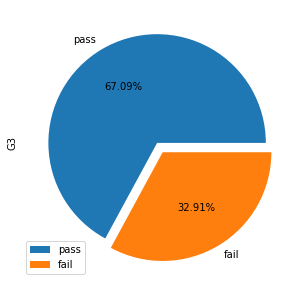

In [ ]:
plt.figure(figsize=(5,5))
data['G3'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%')
plt.legend()
plt.show()

# Encoding Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
bin_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'G3']
multi_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

le = LabelEncoder()
for i in bin_cols :
  data[i] = le.fit_transform(data[i])

data=pd.get_dummies(data = data, columns = multi_cols, drop_first=False)

In [ ]:
train_X.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,0.123418,0.471519,16.686709,0.784810,0.28481,0.908228,2.705696,2.490506,1.465190,2.018987,0.319620,0.123418,0.601266,0.449367,0.515823,0.803797,0.949367,0.822785,0.344937,3.933544,3.256329,3.158228,1.506329,2.272152,3.449367,5.585443,10.984177,10.797468,0.155063,0.085443,0.373418,0.246835,0.139241,0.056962,0.041139,0.537975,0.300633,0.063291,0.360759,0.272152,0.094937,0.272152,0.240506,0.686709,0.072785
std,0.329438,0.499980,1.282339,0.411606,0.45204,0.289162,1.094908,1.091048,0.700605,0.820155,0.714295,0.329438,0.490414,0.498219,0.500542,0.397753,0.219595,0.382456,0.476102,0.907822,0.995605,1.109967,0.930928,1.280619,1.405420,8.064560,3.337579,3.756492,0.362539,0.279983,0.484479,0.431854,0.346746,0.232138,0.198927,0.499347,0.459261,0.243872,0.480983,0.445774,0.293592,0.445774,0.428069,0.464567,0.260195
min,0.000000,0.000000,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.00000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.750000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.00000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.500000,4.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,1.000000,1.00000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.00000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,9,9,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1
391,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,14,16,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
392,1,1,21,0,0,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,10,8,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
393,1,1,18,0,1,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,11,12,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


# Data Partition

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, test_size = 0.2, random_state = 111)

train_X = train.drop(labels='G3', axis=1)
train_Y = train['G3']
test_X = test.drop(labels='G3', axis=1)
test_Y = test['G3']

In [ ]:
##data_1
train_X1 = train_X.drop(labels=['G1', 'G2'], axis=1)
train_Y1 = train['G3']
test_X1 = test_X.drop(labels=['G1', 'G2'], axis=1)
test_Y1 = test['G3']

##data_2
train_X2 = train_X.drop(labels='G1', axis=1)
train_Y2 = train['G3']
test_X2 = test_X.drop(labels='G1', axis=1)
test_Y2 = test['G3']

##data_3
train_X3 = train_X.drop(labels='G2', axis=1)
train_Y3 = train['G3']
test_X3 = test_X.drop(labels='G2', axis=1)
test_Y3 = test['G3']

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X1,train_smote_Y1 = os.fit_resample(train_X1,train_Y1)
train_smote_X1 = pd.DataFrame(data = train_smote_X1,columns=train_X1.columns)
train_smote_Y1 = pd.DataFrame(data = train_smote_Y1)

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X2,train_smote_Y2 = os.fit_resample(train_X2,train_Y2)
train_smote_X2 = pd.DataFrame(data = train_smote_X2,columns=train_X2.columns)
train_smote_Y2 = pd.DataFrame(data = train_smote_Y2)

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X3,train_smote_Y3 = os.fit_resample(train_X3,train_Y3)
train_smote_X3 = pd.DataFrame(data = train_smote_X3,columns=train_X3.columns)
train_smote_Y3 = pd.DataFrame(data = train_smote_Y3)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
#Proportion before smote
train_Y.value_counts()

1    215
0    101
Name: G3, dtype: int64

In [ ]:
#Proportion after smote
train_smote_Y.value_counts()

1    215
0    215
dtype: int64

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRFC=RandomForestClassifier()
modelRFC.fit(train_smote_X,train_smote_Y)

modelRFC1=RandomForestClassifier()
modelRFC1.fit(train_smote_X1,train_smote_Y1)

modelRFC2=RandomForestClassifier()
modelRFC2.fit(train_smote_X2,train_smote_Y2)

modelRFC3=RandomForestClassifier()
modelRFC3.fit(train_smote_X3,train_smote_Y3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predRFC=modelRFC.predict(test_X)
predRFC_1=modelRFC1.predict(test_X1)
predRFC_2=modelRFC2.predict(test_X2)
predRFC_3=modelRFC3.predict(test_X3)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest data: ",accuracy_score(test_Y,predRFC))
print("Accuracy for Random Forest data: ",accuracy_score(test_Y1,predRFC_1))
print("Accuracy for Random Forest data: ",accuracy_score(test_Y2,predRFC_2))
print("Accuracy for Random Forest data: ",accuracy_score(test_Y3,predRFC_3))

Accuracy for Random Forest data:  0.9367088607594937
Accuracy for Random Forest data:  0.6329113924050633
Accuracy for Random Forest data:  0.9367088607594937
Accuracy for Random Forest data:  0.7848101265822784


In [ ]:
from sklearn.metrics import classification_report
target_names = ['pass','fail']
print(classification_report(test_Y, predRFC, target_names=target_names))
print(classification_report(test_Y1, predRFC_1, target_names=target_names))
print(classification_report(test_Y2, predRFC_2, target_names=target_names))
print(classification_report(test_Y3, predRFC_3, target_names=target_names))

              precision    recall  f1-score   support

        pass       0.90      0.93      0.92        29
        fail       0.96      0.94      0.95        50

    accuracy                           0.94        79
   macro avg       0.93      0.94      0.93        79
weighted avg       0.94      0.94      0.94        79

              precision    recall  f1-score   support

        pass       0.50      0.31      0.38        29
        fail       0.67      0.82      0.74        50

    accuracy                           0.63        79
   macro avg       0.59      0.57      0.56        79
weighted avg       0.61      0.63      0.61        79

              precision    recall  f1-score   support

        pass       0.93      0.90      0.91        29
        fail       0.94      0.96      0.95        50

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79

              preci

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDT=DecisionTreeClassifier()
modelDT.fit(train_smote_X,train_smote_Y)

modelDT1=DecisionTreeClassifier()
modelDT1.fit(train_smote_X1,train_smote_Y1)

modelDT2=DecisionTreeClassifier()
modelDT2.fit(train_smote_X2,train_smote_Y2)

modelDT3=DecisionTreeClassifier()
modelDT3.fit(train_smote_X3,train_smote_Y3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predDT=modelDT.predict(test_X)
predDT_1=modelDT1.predict(test_X1)
predDT_2=modelDT2.predict(test_X2)
predDT_3=modelDT3.predict(test_X3)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for Decision Tree data: ",accuracy_score(test_Y,predDT))
print("Accuracy for Decision Tree data: ",accuracy_score(test_Y1,predDT_1))
print("Accuracy for Decision Tree data: ",accuracy_score(test_Y2,predDT_2))
print("Accuracy for Decision Tree data: ",accuracy_score(test_Y3,predDT_3))

Accuracy for Decision Tree data:  0.9113924050632911
Accuracy for Decision Tree data:  0.6075949367088608
Accuracy for Decision Tree data:  0.9113924050632911
Accuracy for Decision Tree data:  0.810126582278481


In [ ]:
from sklearn.metrics import classification_report
target_names = ['pass','fail']
print(classification_report(test_Y, predDT, target_names=target_names))
print(classification_report(test_Y1, predDT_1, target_names=target_names))
print(classification_report(test_Y2, predDT_2, target_names=target_names))
print(classification_report(test_Y3, predDT_3, target_names=target_names))

              precision    recall  f1-score   support

        pass       0.89      0.86      0.88        29
        fail       0.92      0.94      0.93        50

    accuracy                           0.91        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.91      0.91      0.91        79

              precision    recall  f1-score   support

        pass       0.46      0.45      0.46        29
        fail       0.69      0.70      0.69        50

    accuracy                           0.61        79
   macro avg       0.58      0.57      0.57        79
weighted avg       0.60      0.61      0.61        79

              precision    recall  f1-score   support

        pass       0.89      0.86      0.88        29
        fail       0.92      0.94      0.93        50

    accuracy                           0.91        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.91      0.91      0.91        79

              preci

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(train_smote_X,train_smote_Y)

modelKNN1 = KNeighborsClassifier()
modelKNN1.fit(train_smote_X1,train_smote_Y1)

modelKNN2 = KNeighborsClassifier()
modelKNN2.fit(train_smote_X2,train_smote_Y2)

modelKNN3 = KNeighborsClassifier()
modelKNN3.fit(train_smote_X3,train_smote_Y3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predKNN=modelKNN.predict(test_X)
predKNN_1=modelKNN1.predict(test_X1)
predKNN_2=modelKNN2.predict(test_X2)
predKNN_3=modelKNN3.predict(test_X3)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy for K-Nearest Neighbors data: ",accuracy_score(test_Y,predKNN))
print("Accuracy for K-Nearest Neighbors data: ",accuracy_score(test_Y1,predKNN_1))
print("Accuracy for K-Nearest Neighbors data: ",accuracy_score(test_Y2,predKNN_2))
print("Accuracy for K-Nearest Neighbors data: ",accuracy_score(test_Y3,predKNN_3))

Accuracy for K-Nearest Neighbors data:  0.8987341772151899
Accuracy for K-Nearest Neighbors data:  0.5822784810126582
Accuracy for K-Nearest Neighbors data:  0.8734177215189873
Accuracy for K-Nearest Neighbors data:  0.810126582278481


In [ ]:
from sklearn.metrics import classification_report
target_names = ['pass','fail']
print(classification_report(test_Y, predKNN, target_names=target_names))
print(classification_report(test_Y1, predKNN_1, target_names=target_names))
print(classification_report(test_Y2, predKNN_2, target_names=target_names))
print(classification_report(test_Y3, predKNN_3, target_names=target_names))

              precision    recall  f1-score   support

        pass       0.80      0.97      0.88        29
        fail       0.98      0.86      0.91        50

    accuracy                           0.90        79
   macro avg       0.89      0.91      0.89        79
weighted avg       0.91      0.90      0.90        79

              precision    recall  f1-score   support

        pass       0.45      0.69      0.55        29
        fail       0.74      0.52      0.61        50

    accuracy                           0.58        79
   macro avg       0.60      0.60      0.58        79
weighted avg       0.64      0.58      0.59        79

              precision    recall  f1-score   support

        pass       0.77      0.93      0.84        29
        fail       0.95      0.84      0.89        50

    accuracy                           0.87        79
   macro avg       0.86      0.89      0.87        79
weighted avg       0.89      0.87      0.88        79

              preci